# Prereading study storyline
## Loading the data

In [1]:
%matplotlib inline
import scipy
from scipy.stats import mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import sys
import getpass
import math

In [98]:
# from scipy import stats 
dfraw = pd.read_csv('C:\Users\\'+getpass.getuser()+'\Desktop\Clean-data_160217_JBS_cleaned_051316.csv')
dfsurvey = pd.read_csv('C:\Users\\'+getpass.getuser()+'\Desktop\Clean-data_addSurvey_160309_JBS_cleaned_051316.csv')
#please read this about unicode strings eventually: http://www.joelonsoftware.com/articles/Unicode.html


# Klugetastic: make a list, convert to an array and then a df
datalist = []
#header = df.keys()
topics = ['Blackbody','Masses','Resonance']
treatments = ['TextThenPhet','PhetThenText','TextOnly']


#merge with main dataframe
dfmerged = pd.merge(left=dfraw,right=dfsurvey, left_on='anon-id', right_on='anon-id')

phetquestion = {'Blackbody':'q01 - Approximately how long did you spend with the PhET simulation? (in minutes)',
                'Masses':'q5 - Approximately how long did you spend with the PhET simulation? (in minutes)',
                'Resonance':'q6 - Approximately how long did you spend with the PhET simulation? (in minutes)'}
textquestion = {'Blackbody':'q02 - Approximately how long did you spend reading the textbook sections? (in minutes)',
                'Masses':'q6 - Approximately how long did you spend reading the textbook sections? (in minutes)',
                'Resonance':'q7 - Approximately how long did you spend reading the textbook sections? (in minutes)'}

conv_pos = {'nan':np.nan, 'Not at all':0.0, 'Somewhat':1.0, 'Mostly':2.0, 'Definitely':3.0}
conv_neg = {'nan':np.nan, 'Not at all':3.0, 'Somewhat':2.0, 'Mostly':1.0, 'Definitely':0.0}

encountered_question = {'Blackbody':'q03 -  Have you learned about blackbody radiation before? (Choose all that apply.)',
                        'Masses':'q7 - Have you learned about simple harmonic motion before? (Choose all that apply.)',
                        'Resonance':'q8 - Have you learned about resonance before? (Choose all that apply.)'}

def transform_encountered(response):
    response = str(response)
    if response == 'No.':
        return False
    if 'Yes' in response:
        return True
    else: 
        return np.nan

def lickert_convert(response):
    return float(conv_neg[str(response).split('<')[0]])

def compute_survey(responses):
    NAs = 0
    newresponses = []
    for s in responses:
        if s != np.nan:
            newresponses.append(s)
    return sum(newresponses)/len(newresponses)

#now we iterate through the dataframe and creat a row per student x topic
for index, row in dfmerged.iterrows():
    for topic in topics:
        #print row['q5 - For me personally; PhET Sims are usually useless.']
#         calculated_survey = compute_survey([lickert_convert(row['q2 - For me personally; PhET Sims are usually boring.']),
#                     lickert_convert(row['q5 - For me personally; PhET Sims are usually useless.']),
#                     lickert_convert(row['q4 - For me personally; PhET Sims are usually fun.']),
#                     lickert_convert(row['q3 - For me personally; PhET Sims are usually productive.'])])
        datalist.append([str(row['anon-id']),
                        str(row["Reading group_x"]),
                        float(str(row['PreScore.'+topic]).replace('%',''))/100.0,
                        topic,
                        row['Treatment.'+topic+'_x'],
                        float(str(row['PostScore.'+topic]).replace('%',''))/100.0,
                        float(str(row['ClickerScore.'+topic]).replace('%',''))/100.0,
                        row[textquestion[topic]],
                        row[phetquestion[topic]],
#                         calculated_survey,
                        row['q9 - How beneficial was this assignment to your learning?'],
                        row['q10 - How much did you enjoy this assignment?'],
                        transform_encountered(row[encountered_question[topic]])
                        ])

# convert list2 to an array then a dataframe
array2 = np.array(datalist)
colnames = ['student id',"Reading group",'Prescore','Topic','Treatment',
            'Postscore','Clickerscore','Time on text','Time on PhET',
#             'Preattitude',
            'Postattitude - benefitted','Postattitude - enjoyed','Encountered']
df = pd.DataFrame(array2,columns=colnames)

# Organizing the dataframe
#### Now that we have our data frame we can see what it looks like:

In [3]:
df

,student id,Reading group,Prescore,Topic,Treatment,Postscore,Clickerscore,Time on text,Time on PhET,Postattitude - benefitted,Postattitude - enjoyed,Encountered
0,5963,3,nan,Blackbody,TextOnly,1.0,0.67,nan,nan,Not very beneficial.,Somewhat enjoyed it.,nan
1,5963,3,nan,Masses,TextThenPhet,1.0,1.0,25.0,7.0,Not very beneficial.,Somewhat enjoyed it.,True
2,5963,3,nan,Resonance,PhetThenText,0.67,0.33,20.0,6.0,Not very beneficial.,Somewhat enjoyed it.,True
3,25630,1,0.33,Blackbody,PhetThenText,0.67,0.67,nan,nan,Somewhat beneficial.,Somewhat enjoyed it.,nan
4,25630,1,0.0,Masses,TextOnly,0.0,0.75,20.0,0.0,Somewhat beneficial.,Somewhat enjoyed it.,True
5,25630,1,1.0,Resonance,TextThenPhet,0.67,0.0,20.0,10.0,Somewhat beneficial.,Somewhat enjoyed it.,True
6,41441,1,0.67,Blackbody,PhetThenText,0.67,0.67,nan,nan,Somewhat beneficial.,Somewhat enjoyed it.,nan
7,41441,1,0.0,Masses,TextOnly,0.0,0.75,30.0,0.0,Somewhat beneficial.,Somewhat enjoyed it.,False
8,41441,1,0.67,Resonance,TextThenPhet,0.33,0.0,15.0,8.0,Somewhat beneficial.,Somewhat enjoyed it.,False
9,51900,1,0.33,Blackbody,PhetThenText,1.0,0.67,nan,nan,nan,nan,nan


#### First we want to make sure that the columns containing numerical data are treated as such. Let's also collapse the post attitude columns

In [60]:
#converting columns to numerical types
for column in ['Prescore','Postscore','Clickerscore', 'Time on text','Time on PhET']:
    df[column] = pd.to_numeric(df[column],errors='coerce')
df = df.fillna(np.nan)
df = df.replace(to_replace='nan',value=np.nan)

def transform_enjoy(response):
    response = str(response)
    if 'No' in response or 'not' in response:
        return False
    elif 'enjoy' in response: 
        return True
    else: return np.nan
    
def transform_benefit(response):
    response = str(response)
    if 'Not' in response:
        return False
    elif 'beneficial' in response: 
        return True
    else: return np.nan
    
df['Benefitted'] = df['Postattitude - benefitted'].apply(transform_benefit)
df['Enjoyed'] = df['Postattitude - enjoyed'].apply(transform_enjoy)
df.head()

,student id,Reading group,Prescore,Topic,Treatment,Postscore,Clickerscore,Time on text,Time on PhET,Postattitude - benefitted,Postattitude - enjoyed,Encountered,Benefitted,Enjoyed
0,5963,3,NaN,Blackbody,TextOnly,1.00,0.67,NaN,NaN,Not very beneficial.,Somewhat enjoyed it.,NaN,False,True
1,5963,3,NaN,Masses,TextThenPhet,1.00,1.00,25.0,7.0,Not very beneficial.,Somewhat enjoyed it.,True,False,True
2,5963,3,NaN,Resonance,PhetThenText,0.67,0.33,20.0,6.0,Not very beneficial.,Somewhat enjoyed it.,True,False,True
3,25630,1,0.33,Blackbody,PhetThenText,0.67,0.67,NaN,NaN,Somewhat beneficial.,Somewhat enjoyed it.,NaN,True,True
4,25630,1,0.00,Masses,TextOnly,0.00,0.75,20.0,0.0,Somewhat beneficial.,Somewhat enjoyed it.,True,True,True


Unfortunately we have a lot of rows with missing data. If we remove them, we end up with almost half the dataset. We will use this dataset when looking at engagement.

In [62]:
df2 = df.dropna()
df_score = df[['Prescore','Postscore','Topic','Clickerscore','Treatment']].dropna()
df_time = df[['Time on PhET','Time on text','Topic','Treatment','Encountered']].dropna()
df2.shape, df.shape, df_score.shape, df_time.shape

((531, 14), (1533, 14), (1064, 5), (821, 5))

In [31]:
df_score.describe()

,Prescore,Postscore,Clickerscore
count,1064.000000,1064.000000,1064.000000
mean,0.317096,0.469276,0.612650
std,0.306948,0.340606,0.308482
min,0.000000,0.000000,0.000000
25%,0.000000,0.330000,0.330000
50%,0.330000,0.500000,0.670000
75%,0.500000,0.670000,1.000000
max,1.000000,1.000000,1.000000


# Descriptors
## Did the students learn?
#### Let's get a sense of what the students were doing. First let's compare their pre and post scores. In these boxplots, means are in green and medians in red.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B08CCC0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C899DD8>], dtype=object)

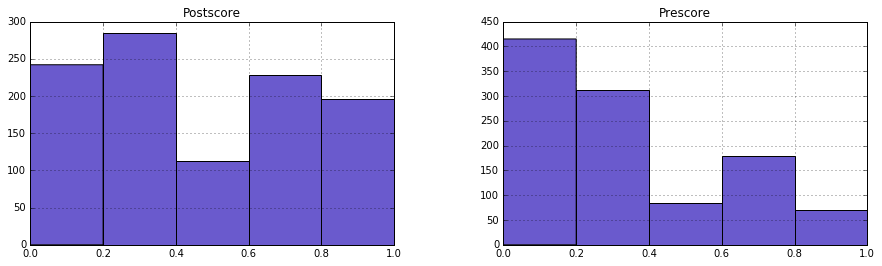

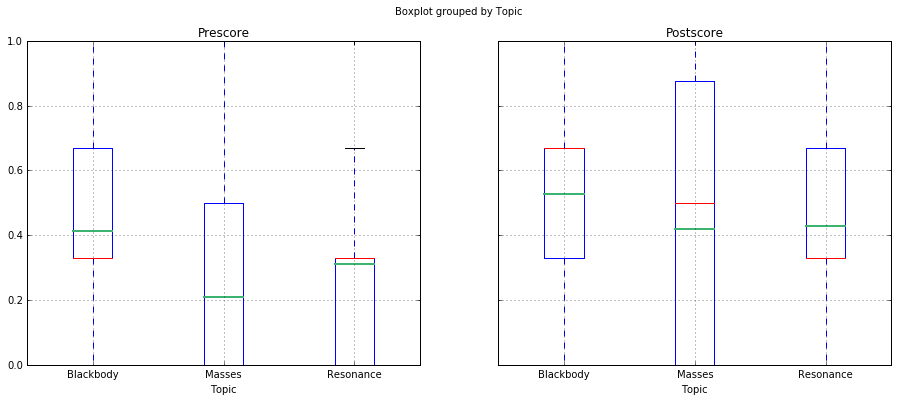

In [32]:
# df_score['diff'] = df['Prescore']-df['Postscore']
# df_score.hist(column=['Prescore','Postscore','diff'],bins=5, layout=(1,3),figsize=(15,4),color='slateblue')
# meanlineprops = dict(linestyle='-', linewidth=2, color='mediumseagreen')
df_score.hist(column=['Prescore','Postscore'],bins=5, layout=(1,2),figsize=(15,4),color='slateblue')
meanlineprops = dict(linestyle='-', linewidth=2, color='mediumseagreen')
df.boxplot(by='Topic',
                column=['Prescore','Postscore'],
                figsize=(15,6),
                meanprops=meanlineprops, meanline=True, showmeans=True)

We can see from the histograms that we a wide spectrum of knowledge levels. The boxplots confirm that the student did indeed learn, as post-scores increased for all topics though in varying amounts per topic. We do a Mann-Whitney test (the equivalent a simple t-test for non normal data) to find out if the difference in score is significant.

In [33]:
m = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Masses']['Prescore'],df_score[df_score['Topic']=='Masses']['Postscore'])
r = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Resonance']['Prescore'],df_score[df_score['Topic']=='Resonance']['Postscore'])
b = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Blackbody']['Prescore'],df_score[df_score['Topic']=='Blackbody']['Postscore'])
print("The significance of the post score difference is:\n{0} for Masses, \n{1} for Resonance, \n{2} for Blackbody".format(m,r,b))

The significance of the post score difference is:
WilcoxonResult(statistic=1674.5, pvalue=3.737850387280999e-17) for Masses, 
WilcoxonResult(statistic=6157.5, pvalue=7.1031929202349846e-09) for Resonance, 
WilcoxonResult(statistic=6276.0, pvalue=8.2879438215317674e-10) for Blackbody


In [34]:
df_score[df_score['Topic']=='Masses'].describe()

,Prescore,Postscore,Clickerscore
count,327.000000,327.000000,327.000000
mean,0.206422,0.429664,0.789755
std,0.314850,0.398934,0.249897
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.750000
50%,0.000000,0.500000,0.750000
75%,0.500000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [35]:
df_score[df_score['Topic']=='Resonance'].describe()

,Prescore,Postscore,Clickerscore
count,342.000000,342.000000,342.000000
mean,0.308129,0.435117,0.366959
std,0.283272,0.319250,0.256315
min,0.000000,0.000000,0.000000
25%,0.000000,0.330000,0.330000
50%,0.330000,0.330000,0.330000
75%,0.330000,0.670000,0.670000
max,1.000000,1.000000,1.000000


In [36]:
df_score[df_score['Topic']=='Blackbody'].describe()

,Prescore,Postscore,Clickerscore
count,395.000000,395.000000,395.000000
mean,0.416481,0.531646,0.678759
std,0.287378,0.294774,0.255734
min,0.000000,0.000000,0.000000
25%,0.330000,0.330000,0.670000
50%,0.330000,0.670000,0.670000
75%,0.670000,0.670000,1.000000
max,1.000000,1.000000,1.000000


## How much were they engaged in the activity?
#### Next let's look at how much time they spent on each activity.

In [48]:
df_time.describe()

,Time on PhET,Time on text
count,821.000000,821.000000
mean,6.876979,34.490256
std,9.978549,29.020891
min,0.000000,0.000000
25%,0.000000,15.000000
50%,5.000000,30.000000
75%,10.000000,45.000000
max,180.000000,300.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D713C50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C5A96A0>], dtype=object)

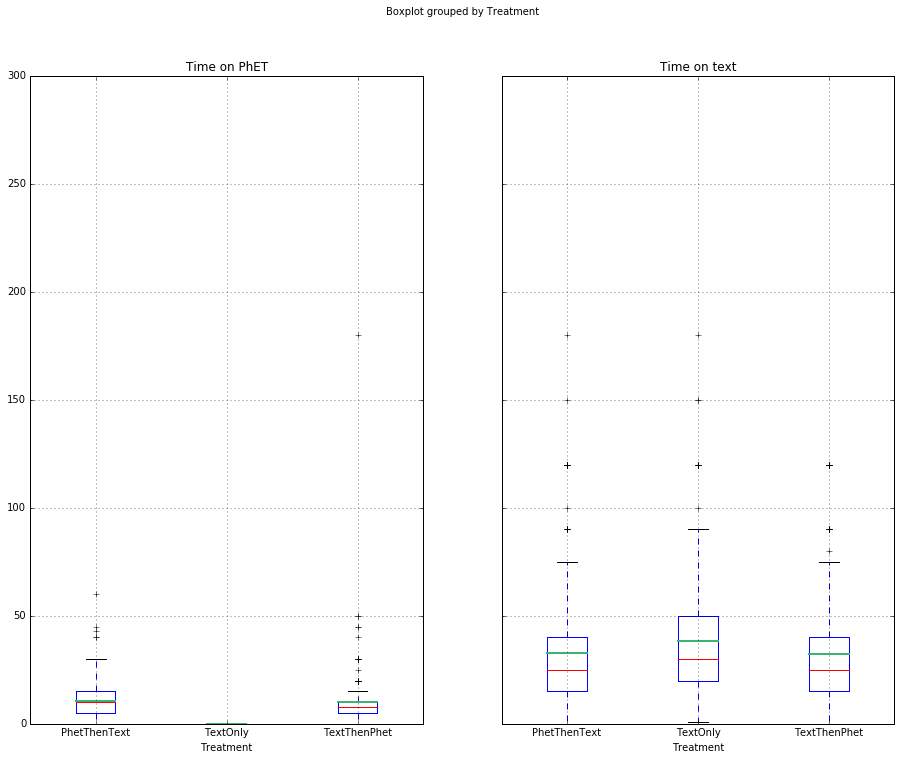

In [49]:
df_time.boxplot(by='Treatment',
                column=['Time on PhET','Time on text'],
                figsize=(15,12),
                meanprops=meanlineprops, meanline=True, showmeans=True)

['TextThenPhet', 'PhetThenText']

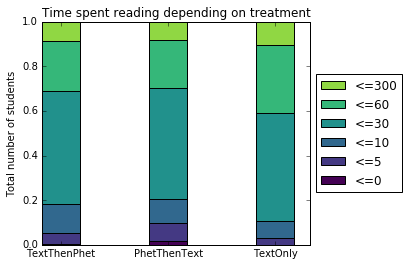

In [106]:
maxtime = int(np.max(df_time['Time on text']))
slices = [0,5,10,30,60,maxtime]

def calculate_totals(time,treatment):
    return sum(df_time[df_time['Treatment']==treatment]['Time on text']<=time)/float(sum(df_time[df_time['Treatment']==treatment]['Time on text']<=1000))

ind = np.arange(len(treatments))# the x locations for the groups
width = 0.35                    # the width of the bars: can also be len(x) sequence
cmap = matplotlib.cm.get_cmap('viridis')

ax = plt.subplot(111)
plt.bar(ind, [calculate_totals(slices[-1],t) for t in treatments], width, color=cmap((len(slices)-1)/float(len(slices))))
for i in reversed(range(len(slices)-1)):
    plt.bar(ind, [calculate_totals(slices[i],t) for t in treatments], 
            width, #bottom= [calculate_totals(slices[i],t) for t in treatments],
            color=cmap((i)/float(len(slices))))
plt.ylabel('Total number of students')
plt.title('Time spent reading depending on treatment')
plt.xticks(ind + width/2., treatments)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
ax.legend(['<='+str(slices[i]) for i in reversed(range(len(slices)))],loc='center left', bbox_to_anchor=(1, 0.5))

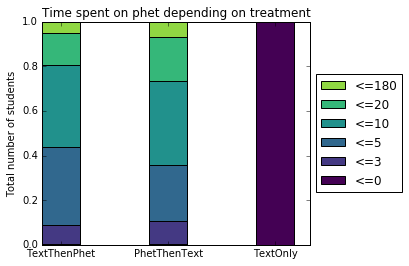

In [104]:
maxtime = int(np.max(df_time['Time on PhET']))
slices = [0,3,5,10,20,maxtime]

def calculate_totals(time,treatment):
    return sum(df_time[df_time['Treatment']==treatment]['Time on PhET']<=time)/float(sum(df_time[df_time['Treatment']==treatment]['Time on PhET']<=1000))

ind = np.arange(len(treatments))# the x locations for the groups
width = 0.35                    # the width of the bars: can also be len(x) sequence
cmap = matplotlib.cm.get_cmap('viridis')

ax = plt.subplot(111)
plt.bar(ind, [calculate_totals(slices[-1],t) for t in treatments], width, color=cmap((len(slices)-1)/float(len(slices))))
for i in reversed(range(len(slices)-1)):
    plt.bar(ind, [calculate_totals(slices[i],t) for t in treatments], 
            width, #bottom= [calculate_totals(slices[i],t) for t in treatments],
            color=cmap((i)/float(len(slices))))
plt.ylabel('Total number of students')
plt.title('Time spent on phet depending on treatment')
plt.xticks(ind + width/2., treatments)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
ax.legend(['<='+str(slices[i]) for i in reversed(range(len(slices)))],loc='center left', bbox_to_anchor=(1, 0.5))

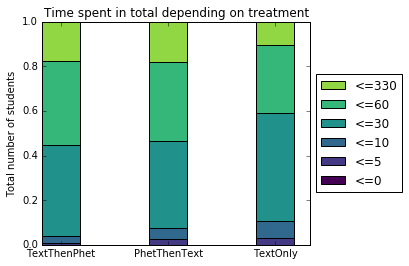

In [105]:
df_time['total time']=df_time['Time on text']+ df_time['Time on PhET']
maxtime = int(np.max(df_time['total time']))
slices = [0,5,10,30,60,maxtime]

def calculate_totals(time,treatment):
    return sum(df_time[df_time['Treatment']==treatment]['total time']<=time)/float(sum(df_time[df_time['Treatment']==treatment]['total time']<=1000))

ind = np.arange(len(treatments))# the x locations for the groups
width = 0.35                    # the width of the bars: can also be len(x) sequence
cmap = matplotlib.cm.get_cmap('viridis')

ax = plt.subplot(111)
plt.bar(ind, [calculate_totals(slices[-1],t) for t in treatments], width, color=cmap((len(slices)-1)/float(len(slices))))
for i in reversed(range(len(slices)-1)):
    plt.bar(ind, [calculate_totals(slices[i],t) for t in treatments], 
            width, #bottom= [calculate_totals(slices[i],t) for t in treatments],
            color=cmap((i)/float(len(slices))))
plt.ylabel('Total number of students')
plt.title('Time spent in total depending on treatment')
plt.xticks(ind + width/2., treatments)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
ax.legend(['<='+str(slices[i]) for i in reversed(range(len(slices)))],loc='center left', bbox_to_anchor=(1, 0.5))

In [55]:
df_time[df_time['Treatment']=='TextThenPhet'].shape, df_time[df_time['Treatment']=='PhetThenText'].shape, df_time[df_time['Treatment']=='TextOnly'].shape

((265, 5), (284, 5), (272, 5))

In [56]:
p = mannwhitneyu(df_time[df_time['Treatment']=='TextThenPhet']['Time on PhET'],df_time[df_time['Treatment']=='PhetThenText']['Time on PhET'])
t = mannwhitneyu(df_time[df_time['Treatment']=='TextThenPhet']['Time on text'],df_time[df_time['Treatment']=='PhetThenText']['Time on text'])
print("The significance of difference between time on task of conditions PhetThenText and TextThenPhet:\n{0} for Phet, \n{1} for text".format(p,t))

The significance of difference between time on task of conditions PhetThenText and TextThenPhet:
MannwhitneyuResult(statistic=34564.5, pvalue=0.091170512233095691) for Phet, 
MannwhitneyuResult(statistic=38612.0, pvalue=0.59484218416680901) for text


#### Now that we know that time spent reading are similar for the "phet" conditions, let's aggregate that data and compare to the "Textonly" condition

In [57]:
p1 = mannwhitneyu(df_time[df_time['Treatment']=='TextThenPhet']['Time on text'],
             df_time[df_time['Treatment']=='TextOnly']['Time on text'])
p2 = mannwhitneyu(df_time[df_time['Treatment']=='PhetThenText']['Time on text'],
             df_time[df_time['Treatment']=='TextOnly']['Time on text'])
print("The significance of difference between time reading compared to 'TextOnly' condition for \nPhetThenText: {0} \nand TextThenPhet: {1}".format(p1,p2))

The significance of difference between time reading compared to 'TextOnly' condition for 
PhetThenText: MannwhitneyuResult(statistic=30439.0, pvalue=0.0017123000976074199) 
and TextThenPhet: MannwhitneyuResult(statistic=31779.5, pvalue=0.00027475262615407712)


In [107]:
p1 = mannwhitneyu(df_time[df_time['Treatment']=='TextThenPhet']['total time'],
             df_time[df_time['Treatment']=='TextOnly']['total time'])
p2 = mannwhitneyu(df_time[df_time['Treatment']=='PhetThenText']['total time'],
             df_time[df_time['Treatment']=='TextOnly']['total time'])
print("The significance of difference between time overall compared to 'TextOnly' condition for \nPhetThenText: {0} \nand TextThenPhet: {1}".format(p1,p2))

The significance of difference between time overall compared to 'TextOnly' condition for 
PhetThenText: MannwhitneyuResult(statistic=39866.5, pvalue=0.032819816953197821) 
and TextThenPhet: MannwhitneyuResult(statistic=42341.5, pvalue=0.04891730854303248)


## Prior and knowledge and attitude influence on engagement
#### If they already encountered the topic were they more likely to score well on the pretest?

In [120]:
df2[(df2['Encountered']=='True')&(df2['Topic']=='Masses')].shape, df2[(df2['Encountered']=='True')&(df2['Topic']=='Resonance')].shape, df2[(df2['Encountered']=='False')&(df2['Topic']=='Masses')].shape, df2[(df2['Encountered']=='False')&(df2['Topic']=='Resonance')].shape

((146, 14), (110, 14), (91, 14), (184, 14))

In [114]:
m0 = mannwhitneyu(df2[(df2['Encountered']=='False')&(df2['Topic']=='Masses')]['Prescore'],df2[(df2['Encountered']=='True')&(df2['Topic']=='Masses')]['Prescore'])
print("The significance of difference between having encountered the topic 'Masses' on prescore {0}".format(m0))

The significance of difference between having encountered the topic 'Masses' on prescore MannwhitneyuResult(statistic=5460.0, pvalue=0.0041033250837857246)


In [115]:
m0 = mannwhitneyu(df2[(df2['Encountered']=='False')&(df2['Topic']=='Resonance')]['Prescore'],df2[(df2['Encountered']=='True')&(df2['Topic']=='Resonance')]['Prescore'])
print("The significance of difference between having encountered the topic 'Resonance' on prescore {0}".format(m0))

The significance of difference between having encountered the topic 'Resonance' on prescore MannwhitneyuResult(statistic=8085.5, pvalue=0.002067685112211482)


#### If they already encountered the topic were they more likely to be engaged?¶

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E6A4FD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B2AEF60>], dtype=object)

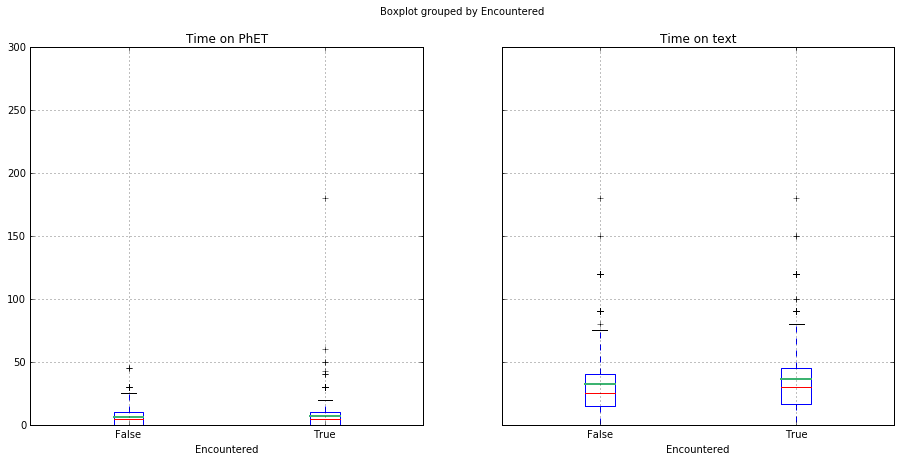

In [63]:
df_time.boxplot(by='Encountered',
                column=['Time on PhET','Time on text'],
                figsize=(15,7),
                meanprops=meanlineprops, meanline=True, showmeans=True)

In [21]:
p = mannwhitneyu(df[df['Encountered']=='True']['Time on PhET'],df[df['Encountered']=='False']['Time on PhET'])
t = mannwhitneyu(df[df['Encountered']=='True']['Time on text'],df[df['Encountered']=='False']['Time on text'])
print("The significance of difference between time on task of conditions depending on if they encountered the topic previously:\n{0} for Phet, \n{1} for text".format(p,t))

The significance of difference between time on task of conditions depending on if they encountered the topic previously:
MannwhitneyuResult(statistic=93191.0, pvalue=0.91992610482092085) for Phet, 
MannwhitneyuResult(statistic=99550.5, pvalue=0.064606164765661347) for text


#### If they enjoyed the activity, were they more likely to be engaged?
#### If they benefitted from the activity, were they more likely to be engaged?
#### *WARNING* - I don't think spearman is the appropriate measure... either way we may not need significance for these tests, only show the bar plots Jared already made.

In [22]:
# convert = {"Not beneficial at all.":0,"Not very beneficial.":1,"Somewhat beneficial.":2,"Very beneficial.":3}
# df2['Quantified benefitted'] = df2['Postattitude - benefitted'].apply(lambda x: convert[x])
# convert = {"No enjoyment at all.":0,"Did not enjoy it very much.":1,"Somewhat enjoyed it.":2,"Enjoyed it very much.":3}
# df2['Quantified enjoyed'] = df2['Postattitude - enjoyed'].apply(lambda x: convert[x])

# s1 = scipy.stats.spearmanr(df2['Quantified benefitted'],df2['Time on PhET'])
# s2 = scipy.stats.spearmanr(df2['Quantified enjoyed'],df2['Time on PhET'])
# s3 = scipy.stats.spearmanr(df2['Quantified benefitted'],df2['Time on text'])
# s4 = scipy.stats.spearmanr(df2['Quantified enjoyed'],df2['Time on text'])
# print("The correlation between time spent doing the Phet and benifitted is: {0}\n".format(s1) +
#       "The correlation between time spent doing the Phet and enjoyement is: {0}\n".format(s2) +
#       "The correlation between time spent doing the reading and benefitted is: {0}\n".format(s3) +
#       "The correlation between time spent doing the reading and enjoyement is: {0}\n".format(s4))

# Performance analysis by engagement
## Visual investigation of effect of engagement

In [96]:
df3 = df2[df2['Treatment']!='TextOnly']
eng_levels_phet = (np.percentile(df3['Time on PhET'],33), np.percentile(df3['Time on PhET'],66))
eng_levels_text = (np.percentile(df2['Time on text'],33), np.percentile(df2['Time on text'],66))
eng_levels_phet, eng_levels_text
# np.std(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Prescore'])/math.sqrt(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])].shape[0])

((5.0, 10.0), (20.0, 30.0))

(0, 3)

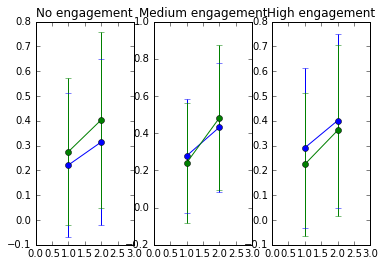

In [91]:
##show line plots with x = pre to post, colored by condition, grouped by engagement level
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
shape_treatment={'TextThenPhet':'-','TextOnly':'.','PhetThenText':'.-'}
treatments_to_use = ['TextThenPhet','PhetThenText']


ax = axs[0]
for t in treatments_to_use:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Postscore'])],
        yerr=[np.std(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Prescore']),
        np.std(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Postscore'])],
        fmt='-o')
ax.set_title('No engagement')

ax = axs[1]
for t in treatments_to_use:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[0]) & (df2['Time on PhET']<eng_levels_phet[1])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[0]) & (df2['Time on PhET']<eng_levels_phet[1])]['Postscore'])],
        yerr=[np.std(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[0]) & (df2['Time on PhET']<eng_levels_phet[1])]['Prescore']),
        np.std(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[0]) & (df2['Time on PhET']<eng_levels_phet[1])]['Postscore'])],
        fmt='-o')
ax.set_title('Medium engagement')

ax = axs[2]
for t in treatments_to_use:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[1])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[1])]['Postscore'])],
        yerr=[np.std(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[1])]['Prescore']),
        np.std(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[1])]['Postscore'])],
        fmt='-o')
ax.set_title('High engagement')

ax.set_xlim([0,3])

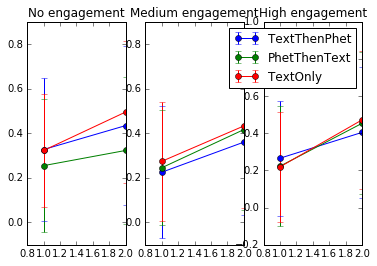

In [103]:
ax.set_xlim([0,3])##show line plots with x = pre to post, colored by condition, grouped by engagement level
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
shape_treatment={'TextThenPhet':'-','TextOnly':'.','PhetThenText':'.-'}


ax = axs[0]
for t in treatments:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']<eng_levels_text[0])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']<eng_levels_text[0])]['Postscore'])],
        yerr=[np.std(df2[(df2['Treatment']==t) & (df2['Time on text']<eng_levels_text[0])]['Prescore']),
        np.std(df2[(df2['Treatment']==t) & (df2['Time on text']<eng_levels_text[0])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('No engagement')

ax = axs[1]
for t in treatments:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[0]) & (df2['Time on text']<eng_levels_text[1])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[0]) & (df2['Time on text']<eng_levels_text[1])]['Postscore'])],
        yerr=[np.std(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[0]) & (df2['Time on text']<eng_levels_text[1])]['Prescore']),
        np.std(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[0]) & (df2['Time on text']<eng_levels_text[1])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('Medium engagement')

ax = axs[2]
for t in treatments:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[1])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[1])]['Postscore'])],
        yerr=[np.std(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[1])]['Prescore']),
        np.std(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[1])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('High engagement')

ax.legend()

## Postscore analysis
#### Next let's group by engagement and see if there is a different in performance.

In [25]:
# import statsmodels.formula.api as smf
# import statsmodels.api as sm

# formula = '''df2["Postscore"] ~ df2["Reading group"] + 
#             df2["Prescore"] + df2["Topic"] +
#             df2["Treatment"]*df2["Time on text"]*df2["Time on PhET"]'''
# glm_f_binom = smf.glm(formula = formula, data = df2.dropna(),  family=sm.families.Binomial())
# res = glm_f_binom.fit()
# print(res.summary())

In [26]:
# phet_median = df2[df2['Treatment']!='TextOnly']['Time on PhET'].median()
# df2['Engaged PhET'] = df2[df2['Treatment']!='TextOnly']['Time on PhET'] >= phet_median
# text_median = df2['Time on text'].median()
# df2['Engaged text'] = df2['Time on text'] >= text_median
# 'The median engagment times for PhET and text are {0} and {1} minutes.'.format(phet_median,text_median)

In [27]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

formula = '''df_score["Postscore"] ~ df_score["Prescore"] + df_score["Topic"]*df_score["Treatment"]'''
glm_f_binom = smf.glm(formula = formula, data = df_score,  family=sm.families.Binomial())
res = glm_f_binom.fit()
print(res.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     df_score["Postscore"]   No. Observations:                 1064
Model:                               GLM   Df Residuals:                     1054
Model Family:                   Binomial   Df Model:                            9
Link Function:                     logit   Scale:                             1.0
Method:                             IRLS   Log-Likelihood:                -696.56
Date:                   Wed, 01 Jun 2016   Deviance:                       1367.1
Time:                           09:33:15   Pearson chi2:                     455.
No. Iterations:                        7                                         
                                                                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------------------

## Clickerscore analysis

In [28]:
formula = '''df_score["Clickerscore"] ~ df_score["Prescore"] + df_score["Topic"]*df_score["Treatment"]'''
glm_f_binom = smf.glm(formula = formula, data = df_score,  family=sm.families.Binomial())
res = glm_f_binom.fit()
print(res.summary())

                    Generalized Linear Model Regression Results                     
Dep. Variable:     df_score["Clickerscore"]   No. Observations:                 1064
Model:                                  GLM   Df Residuals:                     1054
Model Family:                      Binomial   Df Model:                            9
Link Function:                        logit   Scale:                             1.0
Method:                                IRLS   Log-Likelihood:                -636.01
Date:                      Wed, 01 Jun 2016   Deviance:                       1642.7
Time:                              09:33:15   Pearson chi2:                     328.
No. Iterations:                           7                                         
                                                                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------

In [29]:
formula = '''df_score["Clickerscore"] ~ df_score["Prescore"]*df_score["Postscore"] + df_score["Topic"]*df_score["Treatment"]'''
glm_f_binom = smf.glm(formula = formula, data = df_score,  family=sm.families.Binomial())
res = glm_f_binom.fit()
print(res.summary())

                    Generalized Linear Model Regression Results                     
Dep. Variable:     df_score["Clickerscore"]   No. Observations:                 1064
Model:                                  GLM   Df Residuals:                     1052
Model Family:                      Binomial   Df Model:                           11
Link Function:                        logit   Scale:                             1.0
Method:                                IRLS   Log-Likelihood:                -631.66
Date:                      Wed, 01 Jun 2016   Deviance:                       1635.2
Time:                              09:33:15   Pearson chi2:                     321.
No. Iterations:                           7                                         
                                                                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------

#### Interestingly, low or no effect by the prescore on the clickerscore when including the post-score as a covariate... A high effect by post-score! No effect on their interaction. Which means that the postscore was a better indicator than prescore and that the effect by the prescore is included in the post-score. Thus the reading assignment was an equalizing force!

In [108]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
star98 = sm.datasets.star98.load_pandas().data

In [112]:
dta = star98[['NABOVE', 'NBELOW', 'LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP',
              'PCTCHRT', 'PCTYRRND', 'PERMINTE', 'AVYRSEXP', 'AVSALK',
              'PERSPENK', 'PTRATIO', 'PCTAF']]
endog = dta['NABOVE'] / (dta['NABOVE'] + dta.pop('NBELOW'))
del dta['NABOVE']
dta['SUCCESS'] = endog

C:\Users\Sarah\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [113]:
dta['SUCCESS']

0      0.560099
1      0.782609
2      0.590193
3      0.689354
4      0.123077
5      0.599911
6      0.349707
7      0.619518
8      0.390476
9      0.439550
10     0.259947
11     0.889362
12     0.350719
13     0.299419
14     0.539683
15     0.750270
16     0.541114
17     0.449275
18     0.550366
19     0.556522
20     0.366906
21     0.489978
22     0.488673
23     0.310345
24     0.185185
25     0.075758
26     0.429706
27     0.452632
28     0.440994
29     0.570175
         ...   
273    0.458333
274    0.321429
275    0.489768
276    0.258333
277    0.288889
278    0.390464
279    0.381643
280    0.463415
281    0.534884
282    0.351351
283    0.280702
284    0.160000
285    0.330286
286    0.173333
287    0.171642
288    0.584906
289    0.221805
290    0.671053
291    0.550075
292    0.449573
293    0.760307
294    0.750000
295    0.550388
296    0.769882
297    0.288136
298    0.280702
299    0.240260
300    0.349580
301    0.280677
302    0.461538
Name: SUCCESS, dtype: fl